# Estadística Inferencial

## Contenido

- [Prueba de Hipótesis](#Prueba-de-Hipótesis)
    - [¿Qué es una hipótesis y cómo se especifica una?](#¿Qué-es-una-hipótesis-y-cómo-se-especifica-una?)
    - [La hipótesis nula](#La-hipótesis-nula)
    - [P-valor](#P-valor)
    - [Tipos de Hipótesis Alternativas](#Tipos-de-Hipótesis-Alternativas)
    - [Tipos de Errores](#Tipos-de-Errores)
    - [Prueba paramétrica vs no paramétrica](#Prueba-paramétrica-vs-no-paramétrica)
    
    
- [Correlación](#Correlación)
    - [Covarianza y correlación: fórmulas](#Covarianza-y-correlación:-fórmulas)
    - [El problema con Pearson](#El-problema-con-Pearson)
    
    
- [T-test](#T-test)
    - [T-test de una muestra](#T-test-de-una-muestra)
    - [T-test de dos muestras](#T-test-de-dos-muestras)
    - [Wilcoxon signed-rank (T-test no paramétrico)](#Wilcoxon-signed-rank-(T-test-no-paramétrico))
    
    
- [Intervalos de Confianza](#Intervalos-de-Confianza)
    - [Calcular intervalos de confianza mediante fórmula.](#Calcular-intervalos-de-confianza-mediante-fórmula.)
    - [Intervalos de confianza mediante bootstrapping.](#Intervalos-de-confianza-mediante-bootstrapping.)
    
    
- [Ejercicio](#Ejercicio)

## Prueba de Hipótesis


Para que la estadística sea de utilidad no basta con calcular estadísticos, también se tienen que tomar decisiones basadas en los datos que estamos analizando, que acepte o rechace una afirmación relativa al valor de un parámetro. Estas afirmaciones que nos permiten aceptar o rechazar algo, reciben el nombre de hipótesis y el método estadístico de toma de decisión sobre una hipótesis recibe el nombre de prueba de hipótesis. Solemos tener dos hipótesis, una que queremos que ocurra, y otra que tomaremos si no ocurre la primera, la hipótesis alternativa $H_1$ es la hipótesis de la que busco evidencia de que ocurra y la hipótesis nula $H_0$ es la que rechazaremos si tenemos evidencia de la alternativa, _aceptaremos $H_0$ a menos que la evidencia diga lo contrario_.

[Regresar al contenido](#Contenido)

<hr>

# ¿Qué es una hipótesis y cómo se especifica una?


Una afirmación falsable que requiere verificación, generalmente a partir de datos experimentales u observacionales, y que permite realizar predicciones sobre observaciones futuras.



## La hipótesis nula


La _hipótesis nula_ es la _hipótesis aburrida_ ($H_0$), la hipótesis de que no sucede nada interesante en los datos.

En la investigación, se especifica la _hipótesis alternativa_ ($H_1$).

**En el análisis estadístico, prueba la hipótesis nula.**

- $H_1$ → La gente comprará más widgets después de ver el anuncio $X$ en comparación con el anuncio $Y$.

- $H_0$ → El tipo de anuncio no tiene ningún efecto en las compras de widgets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

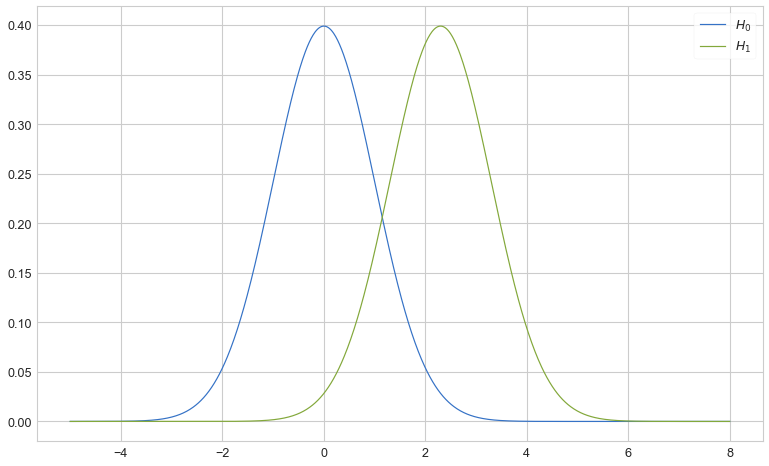

In [3]:
h0 = stats.norm()
h1 = stats.norm(2.3, 1)
x = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$')
ax.legend();

[Regresar al contenido](#Contenido)

# P-valor

- ¿Qué posibilidades hay de que ocurra el valor de $H_1$ si $H_0$ es verdadero?

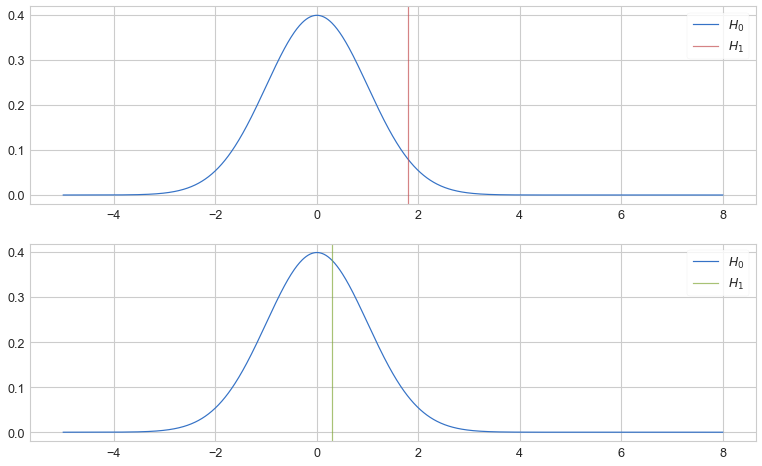

In [4]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots(2, 1, figsize = (13, 8))


ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].axvline(1.8, label = '$H_1$', color = 'r', alpha = 0.7)
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(0.3, label = '$H_1$', color = 'g', alpha = 0.7)
ax[1].legend();

Concepto importante:

- No podemos probar que $ H_1 $ sea cierto. Solo podemos calcular la probabilidad de que se pueda observar el estadístico de prueba asociado con $ H_1 $ dado que no hay un efecto verdadero.


Los valores p son probabilidades. Van de 0 a 1.

- Los valores más cercanos a 0 indican una baja probabilidad de $ H_1 | H_0 $
- Los valores más cercanos a 1 indican una alta probabilidad de $ H_1 | H_0 $


Un hallazgo se denomina `estadísticamente significativo` si el estadístico de prueba es mayor que un umbral.

Eso es si $p(H_1) < p(\alpha)$
El umbral es arbitrario, los valores comunes son $p = 0.05$ o $p = 0.01$

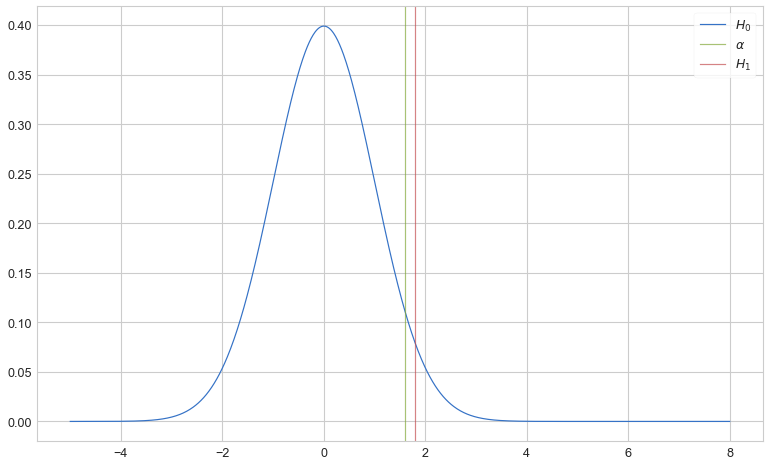

In [5]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(1.6, label = '$\\alpha$', color = 'g', alpha = 0.7)
ax.axvline(1.8, label = '$H_1$', color = 'r', alpha = 0.7)
ax.legend();

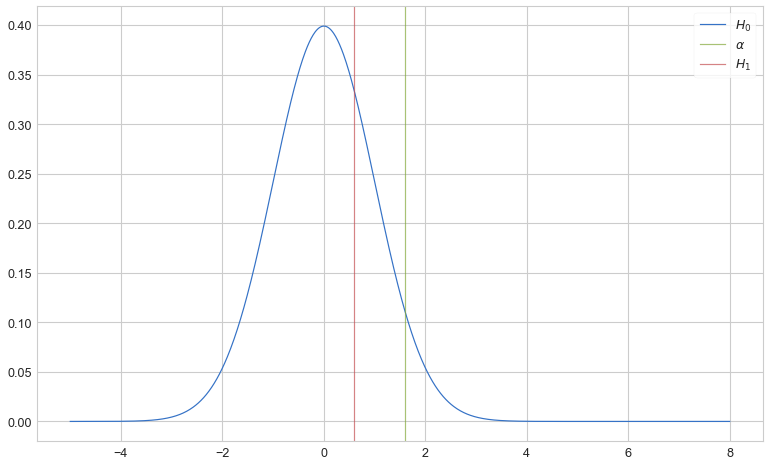

In [6]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(1.6, label = '$\\alpha$', color = 'g', alpha = 0.7)
ax.axvline(0.6, label = '$H_1$', color = 'r', alpha = 0.7)
ax.legend();

Cada lado de la distribución $H_0$ es poco probable.

El umbral del valor p se refiere a toda el área de significancia.

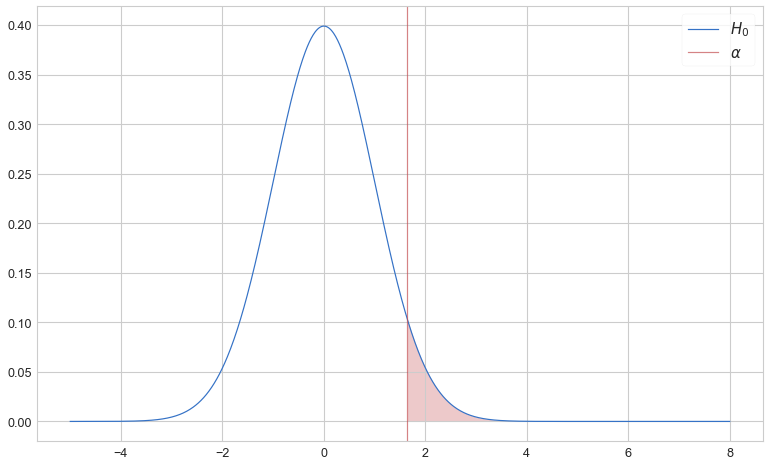

In [7]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)
alpha = 0.05

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(1 - alpha), label = '$\\alpha$', color = 'r', alpha = 0.7)
ax.fill_between(x, h0.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.3, color = 'r')
ax.legend(prop={'size': 15});

Una cosa importante que hay que tener en cuenta es que si nosotros no establecemos un nivel de significancia $\alpha$ entonces:

- Aceptamos $H_0$ si el p-valor es "grande" ($\geq 0.1$)
- Rechazamos $H_0$ si el p-valor es "pequeño" ($\leq 0.05$)
    - El p-valor es _significativo_ si es $ < 0.05$
    - El p-valor es _fuertemente significativo_ si es $ < 0.01$
    - El p-valor es _Muy significativo_ si es $ < 0.001$
    
    
Pero si el p-valor esta entre 0.05 y 0.1, entonces se requerirán estudios posteriores, es lo que se denomina la _zona crepuscular_ o _twilinght zone_. Es decir no podemos concluir si podemos rechazar o no $H_0$.

[Regresar al contenido](#Contenido)




### Tipos de Hipótesis Alternativas


Al momento de realizar una prueba de hipótesis lo vamos a representar de la siguiente manera:

$$
\left\{
\begin{array}{ll}
H_0 & \text{Hipótesis nula}\\
H_1 & \text{Hipótesis alternativa}\\
\end{array}
\right.
$$

Hay que generar una regla de decisión para poder rechazar o no la hipótesis nula partir de la información que contenga la muestra. Tengan en cuenta que es imposible encontrar evidencias de que un parámetro $\mu$ sea igual a cierto valor $\mu_0$, pero si podemos encontrar evidencia de que $\mu < \mu_0$, $\mu > \mu_0$ o $\mu \neq \mu_0$, sabiendo esto la hipótesis alternativa y nula se caracterizaran por lo siguiente:


$$
\left\{
\begin{array}{llll}
H_0: & = & \leq & \geq\\
H_1: & < & > & \neq\\
\end{array}
\right.
$$

por ejemplo si queremos decidir si la media es más pequeña que 2 o no.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = 2\\
H_1: & \mu < 2\\
\end{array}
\right.
$$

si queremos decidir si la media es igual o diferente de 5:


$$
\left\{
\begin{array}{ll}
H_0: & \mu = 5\\
H_1: & \mu \neq 5\\
\end{array}
\right.
$$


Esto nos provoca que haya dos tipos de pruebas, las pruebas unilaterales: Donde $H_1: \mu < \mu_0$ o $H_1: \mu > \mu_0$, o las pruebas bilaterales: $H_1: \mu \neq \mu_0$. El test toma el nombre de las hipótesis alternativas.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu < \mu_0\\
\end{array}
\right.
$$

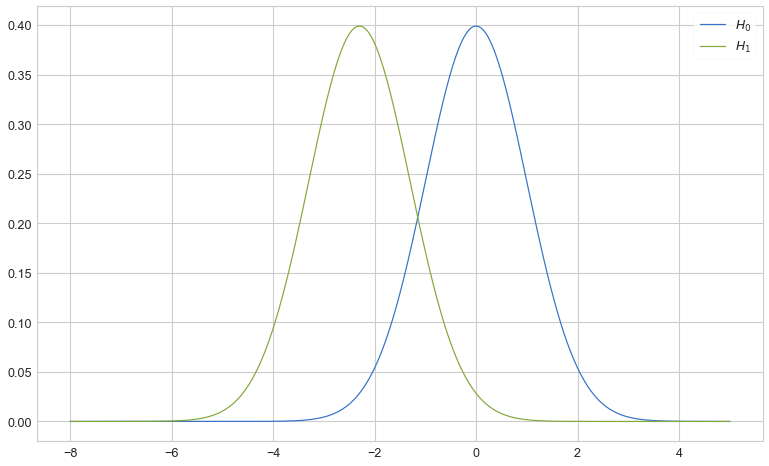

In [8]:
h0 = stats.norm()
h1 = stats.norm(-2.3, 1)
x = np.linspace(-8, 5, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$')
ax.legend();

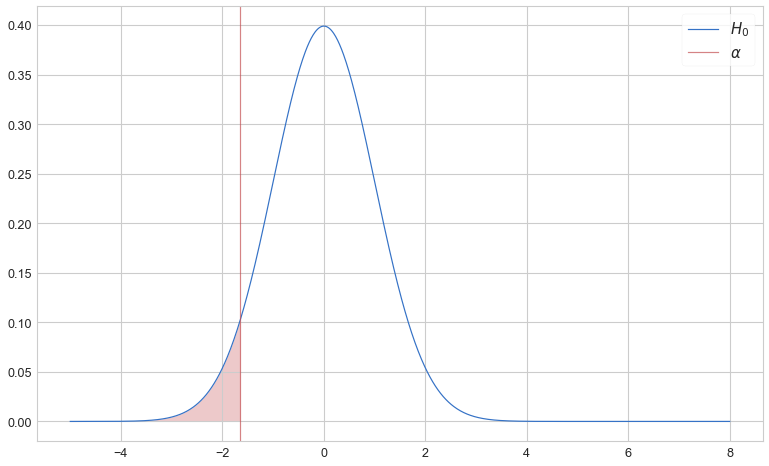

In [9]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)
alpha = 0.05

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(alpha), label = '$\\alpha$', color = 'r', alpha = 0.7)
ax.fill_between(x, h0.pdf(x), where = (x <= h0.ppf(alpha)), alpha = 0.3, color = 'r')
ax.legend(prop = {'size': 15});

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu > \mu_0\\
\end{array}
\right.
$$

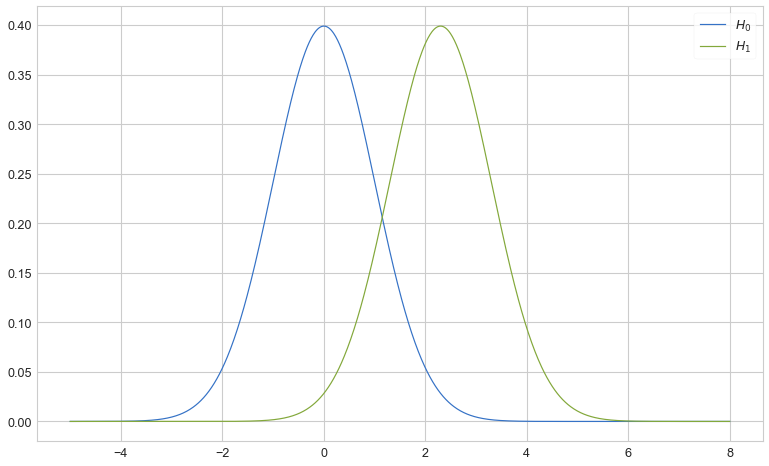

In [10]:
h0 = stats.norm()
h1 = stats.norm(2.3, 1)
x = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$')
ax.legend();

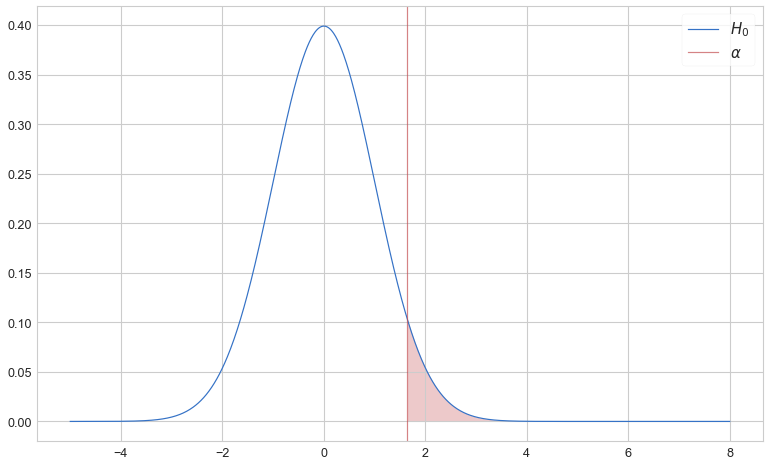

In [11]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)
alpha = 0.05

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(1 - alpha), label = '$\\alpha$', color = 'r', alpha = 0.7)
ax.fill_between(x, h0.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.3, color = 'r')
ax.legend(prop={'size': 15});

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu \ne \mu_0\\
\end{array}
\right.
$$

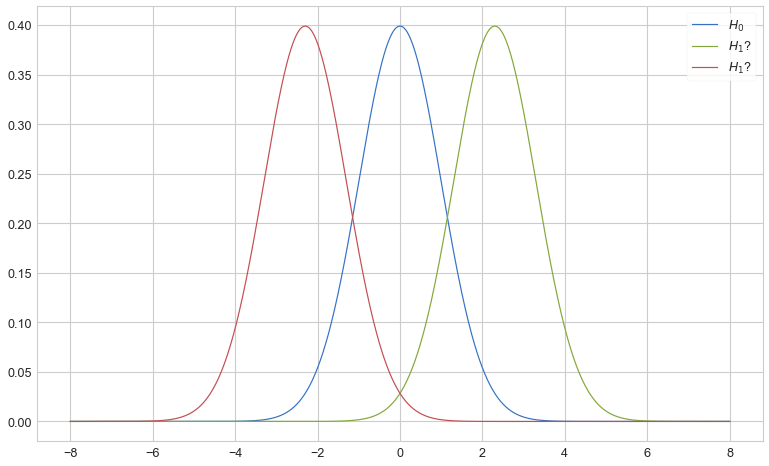

In [12]:
h0 = stats.norm()
h1 = stats.norm(2.3, 1)
h2 = stats.norm(-2.3, 1)
x = np.linspace(-8, 8, 1000)

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$?')
ax.plot(x, h2.pdf(x), label = '$H_1$?')
ax.legend();

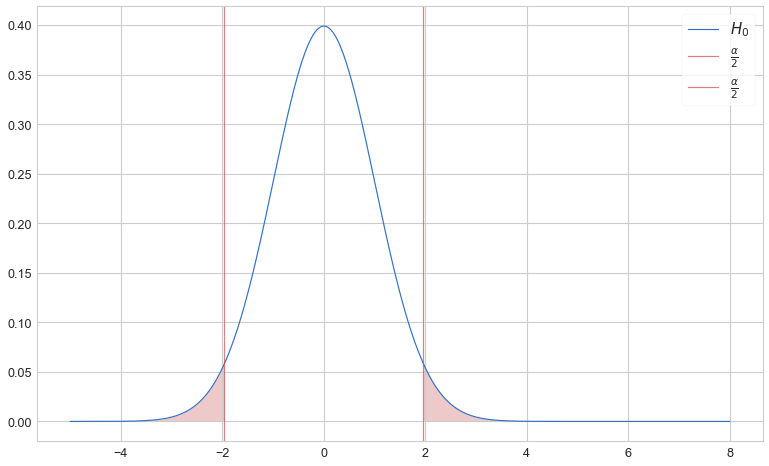

In [13]:
h0 = stats.norm()
x = np.linspace(-5, 8, 1000)
alpha = 0.05

fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(1 - alpha / 2), label = '$\\frac{\\alpha}{2}$', color = 'r', alpha = 0.7)
ax.axvline(h0.ppf(alpha / 2), label = '$\\frac{\\alpha}{2}$', color = 'r', alpha = 0.7)
ax.fill_between(x, h0.pdf(x), where = (x >= h0.ppf(1 - alpha / 2)), alpha = 0.3, color = 'r')
ax.fill_between(x, h0.pdf(x), where = (x <= h0.ppf(alpha / 2)), alpha = 0.3, color = 'r')
ax.legend(prop={'size': 15});

[Regresar al contenido](#Contenido)

### Tipos de Errores


Dado que podemos tomar una decisión con base a la muestra que estamos trabajando, y equivocarnos una prueba de hipótesis puede tener uno de los siguientes cuatro resultados:




|Decisión/Realidad|$H_0$ es verdadera|$H_0$ es falsa|
|:---------------:|:----------------:|:------------:|
|Fracasar en rechazar $H_0$|Decisión correcta de tipo A|Error de tipo II|
|rechazar $H_0$|Error de tipo I|Decisión correcta de tipo B|



<img src = 'https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg'  > 


La decisión correcta de tipo A y B son _fracasar en rechazar $H_0$ cuando $H_0$ es verdadera_ y _rechazar $H_0$ cuando $H_0$ es falsa_. Ahora, no siempre se puede tomar la decisión correcta, por lo que existen los errores de tipo I y II, el error de tipo I es un _falso positivo_ (recordemos que el objetivo del investigador es rechazar $H_0$), es decir, este error se comete cuando e rechaza $H_0$ siendo esta verdadera, el error de tipo I tiene asociado una probabilidad de que ocurra que denotamos $\alpha$ y es denominada significancia de la prueba. Por su parte el error de tipo II es un _falso negativo_ y ocurre cuando no se rechaza $H_0$ siendo esta falsa, la probabilidad de que cometamos un error de tipo II la denotamos por $\beta$.

Para encontrar estos errores se asigna una pequeña probabilidad a cada una de ellas, las probabilidades más comúnmente usadas para $\alpha$ y $\beta$ son 0.01 y 0.05. Por su lado las dos decisiones correctas tienen también sus propias probabilidades, para la decisión correcta de tipo A la probabilidad es $1-\alpha$ y para la decisión correcta de tipo B es $1 - \beta$. A la probabilidad $1 - \beta$ se le llamada _potencia de la prueba_ porque es la medida de la capacidad de la prueba de rechazar una hipótesis nula falsa.

$$P(\text{Error tipo I}) = P(\text{Rechazar} H_0|H_0 \text{es cierta}) = \alpha$$

$$P(\text{Error tipo II}) = P(\text{Aceptar} H_0|H_0 \text{es falsa}) = \beta$$

In [14]:
from ipywidgets import interact

In [15]:
def error_plot(alpha, h1_mean):
    
    h0 = stats.norm()
    h1 = stats.norm(h1_mean, 1)
    x = np.linspace(-5, 8, 1000)
    

    fig, ax = plt.subplots(2, 2, figsize = (13, 8))


    ax[0, 0].plot(x, h0.pdf(x), label = '$H_0$')
    ax[0, 0].plot(x, h1.pdf(x), label = '$H_1$')
    ax[0, 0].axvline(h0.ppf(1 - alpha), label = 'significance threshold ($\\alpha$)', color = 'r', alpha = 0.7)
    ax[0, 0].fill_between(x, h0.pdf(x), where = (x <= h0.ppf(1 - alpha)), alpha = 0.7, color = 'skyblue')
    ax[0, 0].set_title('True Negative')

    ax[0, 1].plot(x, h0.pdf(x), label = '$H_0$')
    ax[0, 1].plot(x, h1.pdf(x), label = '$H_1$')
    ax[0, 1].axvline(h0.ppf(1 - alpha), label = 'significance threshold ($\\alpha$)', color = 'r', alpha = 0.7)
    ax[0, 1].fill_between(x, h1.pdf(x), where = (x <= h0.ppf(1 - alpha)), alpha = 0.3, color = 'red')
    ax[0, 1].set_title('False Negative')

    ax[1, 0].plot(x, h0.pdf(x), label = '$H_0$')
    ax[1, 0].plot(x, h1.pdf(x), label = '$H_1$')
    ax[1, 0].axvline(h0.ppf(1 - alpha), label = 'significance threshold ($\\alpha$)', color = 'r', alpha = 0.7)
    ax[1, 0].fill_between(x, h0.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.3, color = 'red')
    ax[1, 0].set_title('False Positive')

    ax[1, 1].plot(x, h0.pdf(x), label = '$H_0$')
    ax[1, 1].plot(x, h1.pdf(x), label = '$H_1$')
    ax[1, 1].axvline(h0.ppf(1 - alpha), label = 'significance threshold ($\\alpha$)', color = 'r', alpha = 0.7)
    ax[1, 1].fill_between(x, h1.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.7, color = 'skyblue')
    ax[1, 1].set_title('True Positive');

In [16]:
interact(error_plot, alpha = (0.01, 0.5, 0.01), h1_mean = (2, 7, 0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, min=0.01, step=0.01), FloatSlider(…

[Regresar al contenido](#Contenido)

# Prueba paramétrica vs no paramétrica

Qué no significa `no paramétrico`:

- ** Sin parámetros en absoluto **

Significado correcto:

- Estadísticas que no se basan en supuestos sobre la distribución subyacente.
- Métodos de inferencia estadística que generan la distribución $H_0$ a partir de los datos, no de una ecuación.

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| T-test de 1 muestra | Prueba de rangos singulares de Wilcoxon |
| T-test t de 2 muestras | Prueba U de Mann-Whitney |
| Correlación de Pearson | Correlación de Sperman |



** Ventajas y limitaciones **

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| Estándar, ampliamente utilizado | Algunos no son estándar |
| Basado en supuestos | No basado en supuestos |
| Las suposiciones deben probarse | Puede ser lento |
| Puede ser incorrecto cuando se violan las suposiciones | Apropiado para datos no numéricos |
| Computacionalmente rápido | Apropiado para tamaños de muestra pequeños |
|| Algunos métodos dan resultados diferentes cada vez |

**Conclusión**

Utilice métodos paramétricos cuando sea posible, y utilice métodos no paramétricos cuando sea necesario.

[Regresar al contenido](#Contenido)

# Correlación

En el sentido más amplio, la correlación es cualquier asociación estadística, aunque comúnmente se refiere al grado en que un par de variables están relacionadas linealmente.

- Un análisis de correlación calcula un coeficiente de correlación.

- el coeficiente de correlación es un número único que muestra la relación entre dos variables.

- El coeficiente de correlación varía entre -1 y 1.

    - -1 significa una relación inversa perfecta.
    - 0 significa que no hay relación
    - 1 significa una relación positiva perfecta.

- El coeficiente de correlación en sí mismo es una medida continua de la fuerza de la correlación. Se debe calcular un valor p correspondiente para interpretar su significación estadística.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg'>



## Correlación vs causalidad

- La correlación simplemente muestra una relación.
- No revela ni implica causalidad.
- La causalidad puede demostrarse mediante manipulaciones experimentales.

**Ejemplo**

- Helado → Ataques de tiburones

[Regresar al contenido](#Contenido)


## Covarianza y correlación: fórmulas

¿Cuál es la diferencia entre covarianza y correlación ?:

- La covarianza es un número único que mide la relación lineal entre dos variables.
- La covarianza está en la misma escala que los datos originales.
- La correlación es la covarianza escalada.
- Es independiente de la escala de datos.

**Covarianza**

$$cov[X, Y] = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$


**Correlación**

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$


**P-valor**

$$t_{n-2} = \frac{r \sqrt{n - 2}}{1 - r^2}$$

- La significancia estadística se calcula a partir de un valor t que se basa en la fuerza de la correlación y el número de puntos de datos.

In [17]:
lol = pd.read_csv('high_diamond_ranked_10min.csv')

In [18]:
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [20]:
gold = lol['blueTotalGold'].values
exp  = lol['blueTotalExperience'].values

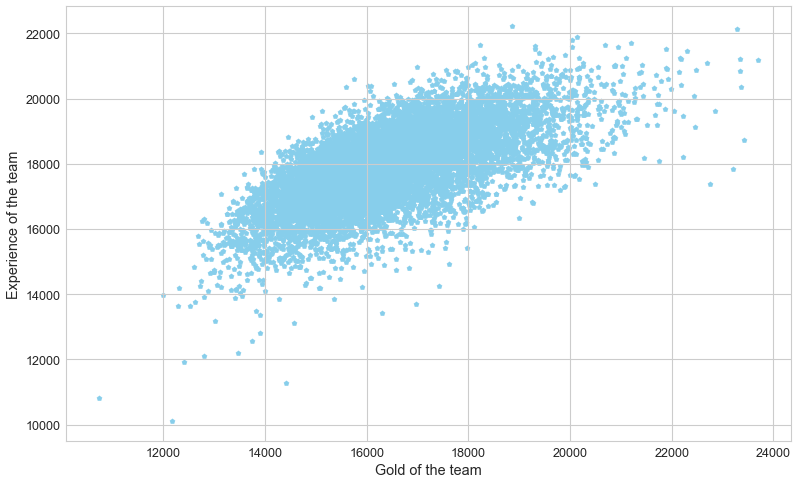

In [21]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(gold, exp, color = 'skyblue', marker = 'p')
ax.set_xlabel('Gold of the team')
ax.set_ylabel('Experience of the team');

In [22]:
import dprocessing as dp

In [24]:
data = lol[['blueTotalGold', 'blueTotalExperience']]
data.head()

,blueTotalGold,blueTotalExperience
0,17210,17039
1,14712,16265
2,16113,16221
3,15157,17954
4,16400,18543


In [25]:
outliers = dp.Outliers()

In [26]:
clean_data = outliers.fit(data = data, how = 'zscore', verbose = True)[0]

222 outliers were found


In [27]:
clean_data.dropna(inplace = True)

In [28]:
clean_gold = clean_data['blueTotalGold']
clean_exp  = clean_data['blueTotalExperience']

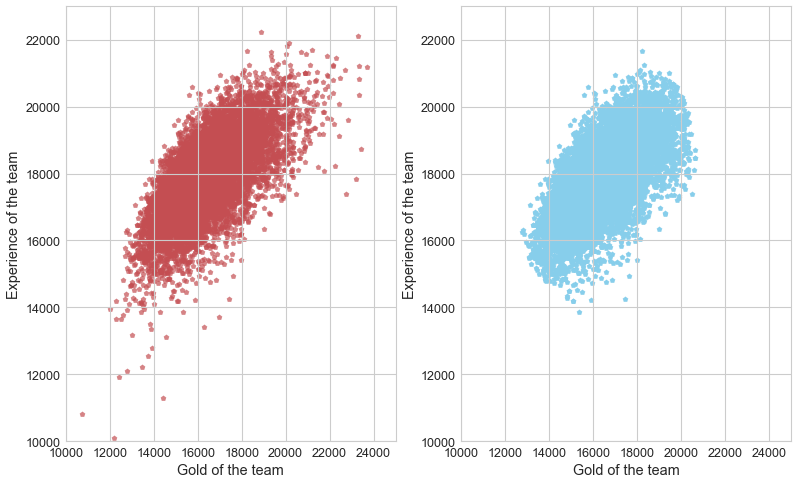

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (13, 8))

ax[0].scatter(gold, exp, color = 'r', marker = 'p', alpha = 0.7)
ax[0].set_xlabel('Gold of the team')
ax[0].set_ylabel('Experience of the team')
ax[0].set_xlim([10_000, 25_000])
ax[0].set_ylim([10_000, 23_000])


ax[1].scatter(clean_gold, clean_exp, color = 'skyblue', marker = 'p')
ax[1].set_xlabel('Gold of the team')
ax[1].set_ylabel('Experience of the team')
ax[1].set_xlim([10_000, 25_000])
ax[1].set_ylim([10_000, 23_000]);

In [30]:
stats.pearsonr(clean_gold, clean_exp)

(0.6456108799079399, 0.0)

In [31]:
r, p = stats.pearsonr(clean_gold, clean_exp)

In [32]:
r

0.6456108799079399

In [33]:
p

0.0

In [34]:
stats.pearsonr(clean_gold[::100], clean_exp[::100])

(0.6988299572835496, 1.7324903433441056e-15)

[Regresar al contenido](#Contenido)


## El problema con Pearson

<img src = 'https://www.researchgate.net/profile/Andrew-Heathcote/publication/280302159/figure/fig2/AS:614021682171910@1523405585885/Anscombes-quartet-highlights-the-importance-of-plotting-data-to-confirm-the-validity-of.png'>


- La correlación de Pearson puede representar de forma excesiva o insuficiente las relaciones si contienen no linealidades o valores atípicos.

- Pearson es apropiado para datos distribuidos normalmente.



### Correlación de Spearman

Este es el método dominante para las correlaciones no paramétricas y es una alternativa para la correlación de Pearson.

- Pearson y Spearman convergen cuando los datos se distribuyen normalmente.


La $\rho$ de Spearman busca una una relación monótona, independientemente de si la relación es lineal o no lineal.


- Para calcular $\rho$, los datos son ordenados y reemplazados por su respectivo orden.

    - $ [3321654, -40, 1, 0] a [4, 1, 3, 2] $
    
- Calcular el coeficiente de correlación de Pearson en rangos.

- Mismo valor p para Pearson.

In [35]:
stats.spearmanr(clean_gold, clean_exp)

SpearmanrResult(correlation=0.6500868985721483, pvalue=0.0)

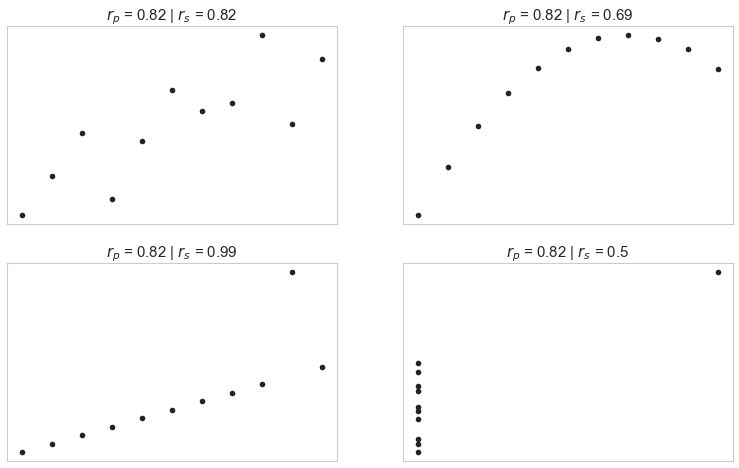

In [36]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig, ax = plt.subplots(2, 2, figsize =(13, 8))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[0]
    corr_s = stats.spearmanr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[0]
    ax[i].set_title('$r_p$ = {} | $r_s$ = {}'.format(np.round(corr_p, 2),np.round(corr_s, 2)), fontsize = 15)



[Regresar al contenido](#Contenido)


# T-test

## Propósito e interpretación de la prueba t

La prueba T es una de las estadísticas más importantes y más utilizadas. La idea principal de la prueba t es comparar los valores (normalmente la media) entre dos grupos.

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

La fórmula general del t-test es la siguiente:

$$t_k = \frac{\bar{x} - \bar{y}}{\frac{s}{\sqrt{n}}}$$

In [37]:
def studend_vs_gauss(n):
    
    #distribution
    gauss   = stats.norm()
    student = stats.t(n)
    
    x = np.linspace(-3, 3, 1000)
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    ax.plot(x, gauss.pdf(x), label = 'Normal Distribution')
    ax.plot(x, student.pdf(x), color = 'r', label = "Student's t-Distribution {}".format(n))
    ax.set_title('Gauss vs Student distribution')
    ax.legend(prop={'size': 15})

In [38]:
interact(studend_vs_gauss, n = (1, 50, 1));

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

[Regresar al contenido](#Contenido)

## T-test de una muestra

Pruebe si se pudo haber extraído un conjunto de números de una distribución con una media especificada.


- Probar si el coeficiente intelectual de un grupo de estudiantes es significativamente diferente de 100.

$$t_{n - 1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$


- $\bar{x}$ → media muestral
- $\mu$ → valor de $H_0$ 
- $s$ → desviasión estandar muestral
- $n$ → Número de puntos
- $n - 1$ → grados de libertad

### T-test de una muestra: supuestos

1. Los datos son numéricos (no categóricos).
2. Los datos son independientes entre sí.
3. Los datos se extraen aleatoriamente de la población a la que se debe hacer una generalización.
4. La media y la desviación estándar son medidas válidas de tendencia central y dispersión.

In [39]:
drug_data = pd.read_csv('Islander_data.csv')

In [40]:
drug_data.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [42]:
drug_data['Diff'].mean()

2.954545454545455

In [43]:
drug_data.tail()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2
197,Chloe,Takahashi,32,S,3,T,43.1,42.1,-1.0


In [44]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [45]:
drug_data['Drug'].unique()

array(['A', 'S', 'T'], dtype=object)

In [48]:
drug_data['Happy_Sad_group'].unique()

array(['H', 'S'], dtype=object)

In [49]:
drug_data['Dosage'].unique()

array([1, 2, 3], dtype=int64)

In [50]:
happy = {d : drug_data[(drug_data['Drug'] == d) & (drug_data['Happy_Sad_group'] == 'H')] for d in drug_data['Drug'].unique()}
sad   = {d : drug_data[(drug_data['Drug'] == d) & (drug_data['Happy_Sad_group'] == 'S')] for d in drug_data['Drug'].unique()}

In [51]:
happy.keys()

dict_keys(['A', 'S', 'T'])

In [52]:
happy['A']

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
7,Jamie,Durand,38,H,1,A,76.3,74.8,-1.5
8,Josefa,Durand,29,H,1,A,56.2,45.0,-11.2
12,Ayano,Kennedy,39,H,1,A,35.5,40.7,5.2
13,Grace,Kennedy,26,H,1,A,85.6,84.3,-1.3
15,Kaito,McCarthy,48,H,1,A,53.5,56.3,2.8
17,Jun,Morin,26,H,1,A,64.0,72.5,8.5
19,Justine,Summers,53,H,1,A,45.0,49.2,4.2


In [53]:
for k in happy.keys():
    happy[k] = {d : happy[k][(happy[k]['Dosage'] == d)] for d in happy[k]['Dosage'].unique()}
    sad[k]   = {d : sad[k][(sad[k]['Dosage'] == d)] for d in sad[k]['Dosage'].unique()}

In [54]:
message = 'Happy {} dosage {} group: {} | Sad {} dosage {} group: {}'
for k1 in happy.keys():
    for k2 in happy[k].keys():
        print(message.format(k1, k2, happy[k1][k2].shape[0], k1, k2, sad[k1][k2].shape[0]))

Happy A dosage 1 group: 11 | Sad A dosage 1 group: 12
Happy A dosage 2 group: 11 | Sad A dosage 2 group: 11
Happy A dosage 3 group: 11 | Sad A dosage 3 group: 11
Happy S dosage 1 group: 11 | Sad S dosage 1 group: 11
Happy S dosage 2 group: 11 | Sad S dosage 2 group: 11
Happy S dosage 3 group: 11 | Sad S dosage 3 group: 11
Happy T dosage 1 group: 11 | Sad T dosage 1 group: 11
Happy T dosage 2 group: 11 | Sad T dosage 2 group: 11
Happy T dosage 3 group: 11 | Sad T dosage 3 group: 10


<AxesSubplot:>

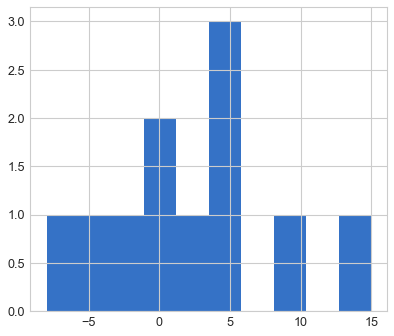

In [55]:
happy['A'][2]['Diff'].hist()

$$
\left\{
\begin{matrix}
H_0 & \mu = 0\\
H_1 & \mu \ne 0\\
\end{matrix}
\right.
$$

In [57]:
happy['A'][1]['Diff'].mean()

-0.6090909090909091

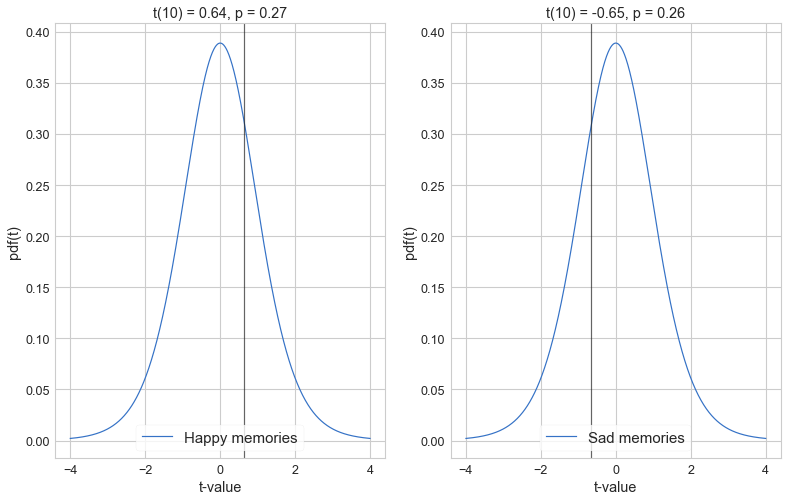

In [58]:
## "manual" t-test

# the null-hypothesis value
mu = 0

# compute the t-value
t_happy = (happy['S'][2]['Diff'].mean() - mu) / (happy['S'][2]['Diff'].std() / np.sqrt(happy['S'][2].shape[0]))
t_sad   = (sad['S'][2]['Diff'].mean() - mu) / (sad['S'][2]['Diff'].std() / np.sqrt(sad['S'][2].shape[0]))

# degrees of freedom
df_happy = happy['S'][2].shape[0] - 1
df_sad   = sad['S'][2].shape[0] - 1


#distributions
dist_happy = stats.t(df_happy)
dist_sad   = stats.t(df_sad)

# p-value
pval_happy = 1 - dist_happy.cdf(abs(t_happy))
pval_sad   = 1 - dist_sad.cdf(abs(t_sad))


# show the H0 parameter distribution and observed t-value
x = np.linspace(-4, 4, 1001)
fig, ax = plt.subplots(1, 2, figsize = (13, 8))

ax[0].plot(x, dist_happy.pdf(x), label = 'Happy memories')
ax[0].axvline(t_happy, color = 'k', alpha = 0.7)
ax[0].set_xlabel('t-value')
ax[0].set_ylabel('pdf(t)')
ax[0].set_title('t({}) = {}, p = {}'.format(df_happy, np.round(t_happy, 2), np.round(pval_happy, 2)))
ax[0].legend(prop={'size': 15})

ax[1].plot(x, dist_sad.pdf(x), label = 'Sad memories')
ax[1].axvline(t_sad, color = 'k', alpha = 0.7)
ax[1].set_xlabel('t-value')
ax[1].set_ylabel('pdf(t)')
ax[1].set_title('t({}) = {}, p = {}'.format(df_sad, np.round(t_sad, 2), np.round(pval_sad, 2)))
ax[1].legend(prop={'size': 15});

(0.1455779211536551, 0.005729140497608309)

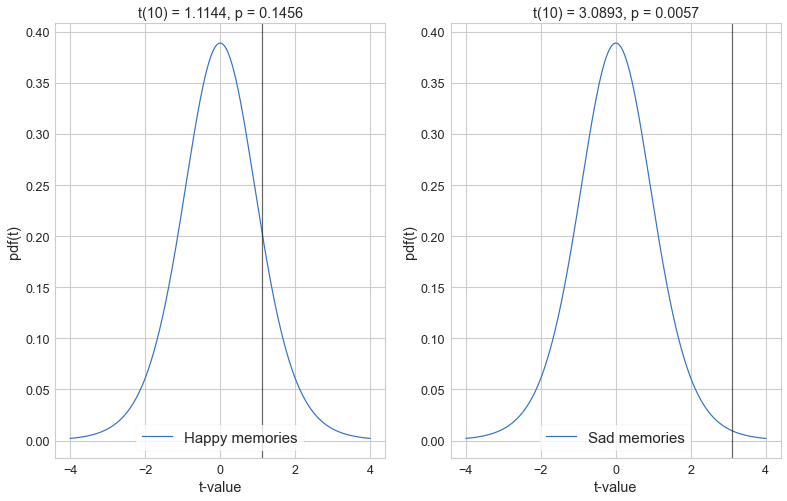

In [59]:
## "manual" t-test

# the null-hypothesis value
mu = 0

# compute the t-value
t_happy = (happy['A'][2]['Diff'].mean() - mu) / (happy['A'][2]['Diff'].std(ddof = 1) / np.sqrt(happy['A'][2].shape[0]))
t_sad   = (sad['A'][2]['Diff'].mean() - mu) / (sad['A'][2]['Diff'].std(ddof = 1) / np.sqrt(sad['A'][2].shape[0]))

# degrees of freedom
df_happy = happy['A'][2].shape[0] - 1
df_sad   = sad['A'][2].shape[0] - 1


#distributions
dist_happy = stats.t(df_happy)
dist_sad   = stats.t(df_sad)

# p-value
pval_happy = 1 - dist_happy.cdf(abs(t_happy))
pval_sad   = 1 - dist_sad.cdf(abs(t_sad))


# show the H0 parameter distribution and observed t-value
x = np.linspace(-4, 4, 1001)
fig, ax = plt.subplots(1, 2, figsize = (13, 8))

ax[0].plot(x, dist_happy.pdf(x), label = 'Happy memories')
ax[0].axvline(t_happy, color = 'k', alpha = 0.7)
ax[0].set_xlabel('t-value')
ax[0].set_ylabel('pdf(t)')
ax[0].set_title('t({}) = {}, p = {}'.format(df_happy, np.round(t_happy, 4), np.round(pval_happy, 4)))
ax[0].legend(prop={'size': 15})

ax[1].plot(x, dist_sad.pdf(x), label = 'Sad memories')
ax[1].axvline(t_sad, color = 'k', alpha = 0.7)
ax[1].set_xlabel('t-value')
ax[1].set_ylabel('pdf(t)')
ax[1].set_title('t({}) = {}, p = {}'.format(df_sad, np.round(t_sad, 4), np.round(pval_sad, 4)))
ax[1].legend(prop={'size': 15});

pval_happy, pval_sad

In [60]:
stats.ttest_1samp(happy['A'][2]['Diff'], mu)

Ttest_1sampResult(statistic=1.1144448017508821, pvalue=0.2911558423073102)

In [61]:
stats.ttest_1samp(sad['A'][2]['Diff'], mu)

Ttest_1sampResult(statistic=3.08926643279829, pvalue=0.011458280995216594)

In [65]:
t, p = stats.ttest_1samp(happy['A'][2]['Diff'], mu)

p, pval_happy

(0.2911558423073102, 0.1455779211536551)

[Regresar al contenido](#Contenido)

# T-test de dos muestras

Pruebe si se podrían haber extraído dos conjuntos de números de la misma distribución.


**Ejemplo**

- Pruebe si los niveles de estrés autoinformados cambian después de 6 semanas de 'distanciamiento social'.

(Declaraciones formales: Estime la probabilidad de que los niveles de estrés autoinformados antes y después de 6 semanas de distanciamiento social se extraigan de la misma distribución).

Hay varias fórmulas de prueba t de dos muestras. El numerador es siempre el mismo, pero el denominador depende de si los grupos están emparejados o no emparejados, tienen una varianza igual o desigual y tienen tamaños de muestra emparejados o diferentes.

- Emparejado o no emparejado: si los dos grupos de datos provienen del mismo o de diferentes individuos.

    - Emparejado: Los mismos individuos autoinforman sus niveles de estrés antes y después del distanciamiento social.
    - No emparejado: cambio en el estrés relacionado con el distanciamiento social en Dinamarca frente a Singapur.

- Varianza igual o desigual: si los dos grupos tienen (aproximadamente) la misma varianza.

    - Igualdad de varianza: los grupos 'A' y 'B' son estudiantes caucásicos de 20 años de la misma universidad; El grupo 'A' estudia ingeniería y el grupo 'B' estudia informática.
    - Varianza desigual: el grupo 'A' son estudiantes caucásicos de 20 años de la misma universidad de ingeniería, el grupo 'B' es una muestra aleatoria de 20 años de todo el país.

- Tamaños de muestra iguales o desiguales: si los grupos tienen el mismo número de valores (se aplica solo a grupos no apareados).

$$t_{df} = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{(n_1 - 1)s_{1}^{2} + (n_2 - 1)s_{2}^{2}}{n_1 + n_2 - 2}} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$


- Comparar el tiempo medio de diferencia en los pacientes que recibieron placebo y la droga 'T'

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

In [68]:
stats.ttest_ind(happy['T'][1]['Diff'], happy['S'][1]['Diff'])

Ttest_indResult(statistic=0.31049601408038124, pvalue=0.7593963654023465)

In [69]:
message = 'Happy group Droge T vs S Dosage: {}| p-value: {}\nSad group Droge T vs S Dosage: {}  | p-value: {}'

for k in happy['T'].keys():
    t_h, p_h = stats.ttest_ind(happy['T'][k]['Diff'], happy['S'][k]['Diff'], equal_var = True)
    t_s, p_s = stats.ttest_ind(sad['T'][k]['Diff'], sad['S'][k]['Diff'], equal_var = True)
    
    print(message.format(k, p_h, k, p_s))
    print()
    print('---------------------------------------------------------------')

Happy group Droge T vs S Dosage: 1| p-value: 0.7593963654023465
Sad group Droge T vs S Dosage: 1  | p-value: 0.0038717672605897663

---------------------------------------------------------------
Happy group Droge T vs S Dosage: 2| p-value: 0.8614214443336936
Sad group Droge T vs S Dosage: 2  | p-value: 0.4461217180012308

---------------------------------------------------------------
Happy group Droge T vs S Dosage: 3| p-value: 0.6608929861377766
Sad group Droge T vs S Dosage: 3  | p-value: 0.2710972880204716

---------------------------------------------------------------


In [70]:
message = 'Happy group Droge A vs S Dosage: {}| p-value: {}\nSad group Droge A vs S Dosage: {}  | p-value: {}'

for k in happy['T'].keys():
    t_h, p_h = stats.ttest_ind(happy['A'][k]['Diff'], happy['S'][k]['Diff'], equal_var = True)
    t_s, p_s = stats.ttest_ind(sad['A'][k]['Diff'], sad['S'][k]['Diff'], equal_var = True)
    
    print(message.format(k, p_h, k, p_s))
    print()
    print('---------------------------------------------------------------')

Happy group Droge A vs S Dosage: 1| p-value: 0.5085391931306007
Sad group Droge A vs S Dosage: 1  | p-value: 0.4296380549705622

---------------------------------------------------------------
Happy group Droge A vs S Dosage: 2| p-value: 0.6767131506956277
Sad group Droge A vs S Dosage: 2  | p-value: 0.024489537229196407

---------------------------------------------------------------
Happy group Droge A vs S Dosage: 3| p-value: 1.3952083917016578e-06
Sad group Droge A vs S Dosage: 3  | p-value: 1.9427641902863007e-06

---------------------------------------------------------------


In [72]:
#stats.ttest

[Regresar al contenido](#Contenido)

# Wilcoxon signed-rank (T-test no paramétrico)


Alternativa no paramétrica al T-test de una o dos muestras.

- Se utiliza principalmente cuando los datos no se ajustan al supuesto de normalidad.

- Pruebe las diferencias en las medianas en lugar de las diferencias en las medias (la mediana es insensible a los valores atípicos)


| Nombre de la prueba | Cuándo usar |
|: -------: |: ---------: |
| Wilcoxon signed-rank | Una muestra |
| Signed-rank | Dos muestras emparejadas |
| U-test de Mann-Whitney | Dos muestras independientes |
| U-test de Mann-Whitney-Wilcoxon | Dos muestras independientes |
| Wilcoxon rank-sum test | Dos muestras independientes |


1. Eliminar pares iguales (eliminar pares iguales de puntos de datos que igualen el valor $H_0$)
    - ¿Por qué? Los pares iguales no contribuyen a la prueba de ninguna manera.
2. Transforma a ranking las direrencias
    - $r = rank(|x - y|)$
    

3. Suma ranking donde $x > y$
    - $W = \sum (r \times (x > y))$
    
    
4. Convertir a z

$$Z = \frac{W - \frac{n(n + 1)}{4}}{\sqrt{\frac{n(n + 1)(2n + 1)}{24}}}$$



- $n$ Es el número de pares restantes.
- $Z$ esta normalmente distribuida bajo $H_0$ y se le puede obtener un p-valor.

In [73]:
stats.wilcoxon(happy['A'][3]['Mem_Score_Before'], happy['A'][3]['Mem_Score_After'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [75]:
stats.mannwhitneyu(happy['A'][3]['Mem_Score_Before'], happy['A'][3]['Mem_Score_After'])

MannwhitneyuResult(statistic=13.0, pvalue=0.0010134728234863534)

In [74]:
stats.wilcoxon(happy['S'][2]['Diff'] - 8)

WilcoxonResult(statistic=4.0, pvalue=0.0068359375)

[Regresar al contenido](#Contenido)

# Intervalos de Confianza

## ¿Qué son los intervalos de confianza y por qué los necesitamos?

Imagina que hacemos los siguientes estudios:

- Estudio 1: Mida la altura en 10 personas seleccionadas al azar, calcule el promedio. Repite 500 veces.
- Estudio 2: Medir la altura en 80 personas seleccionadas al azar, calcular el promedio. Repite 500 veces.

In [76]:
#simulate the population
dist = stats.norm(1.84, 0.17)

population = dist.rvs(1_582_299)

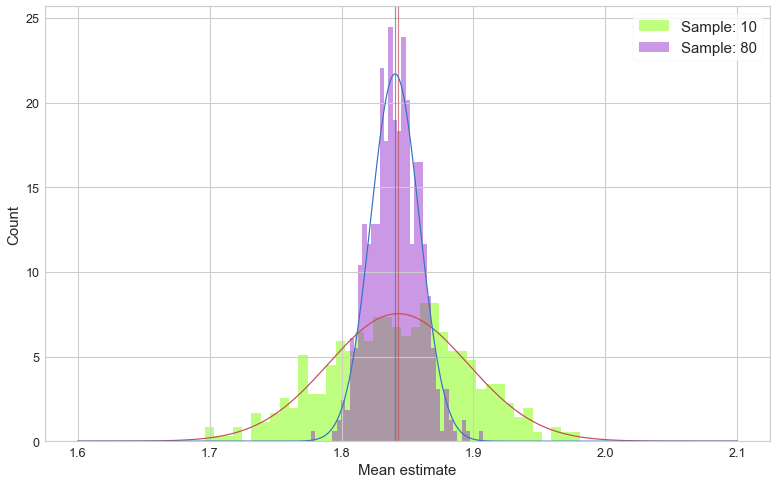

In [77]:
samplesize1   = 10
samplesize2   = 80
numberOfExps  = 500

samplemeans1  = np.zeros(numberOfExps)
samplemeans2  = np.zeros(numberOfExps)

for i in range(numberOfExps):
    # get a sample and compute its mean
    samplemeans1[i] = np.mean(np.random.choice(population, samplesize1))
    samplemeans2[i] = np.mean(np.random.choice(population, samplesize2))

    
gauss1 = stats.norm(samplemeans1.mean(), samplemeans1.std())
gauss2 = stats.norm(samplemeans2.mean(), samplemeans2.std())

x = np.linspace(1.60, 2.10, 1000)
# and show its distribution


# show the distribution
fig, ax = plt.subplots(figsize = (13, 8))
ax.hist(samplemeans1, color = [127 / 255, 255 / 255, 0 / 255, 0.5], density = True, bins = 40, label = 'Sample: 10');
ax.plot(x, gauss1.pdf(x), color = 'r')
ax.axvline(samplemeans1.mean(), c = 'r', alpha = 0.7)
ax.hist(samplemeans2, color = [153 / 255, 50 / 255, 204 / 255, 0.5], density = True, bins = 40, label = 'Sample: 80');
ax.plot(x, gauss2.pdf(x), color = 'b')
ax.axvline(samplemeans2.mean(), c = 'b', alpha = 0.7)
ax.set_xlabel('Mean estimate', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.legend(prop = {'size' : 15});

2.9968969961487173
2.619929453262787


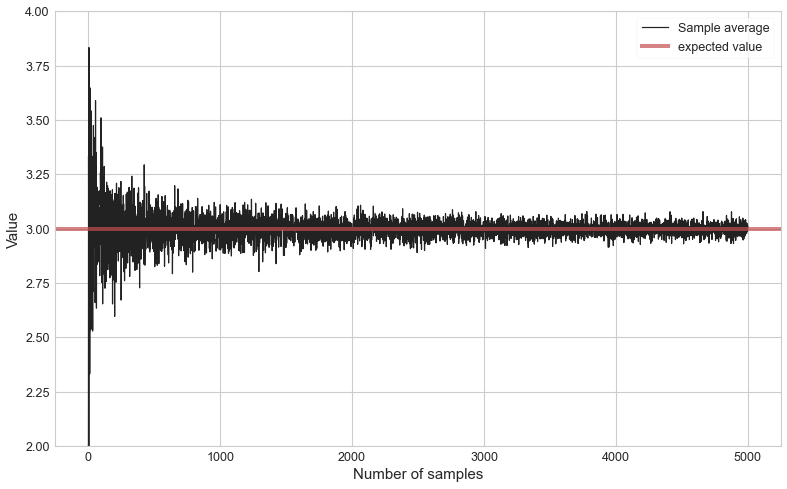

In [78]:
#Illegal die
probabilities = np.array([1/4, 1/4, 1/8, 1/8, 1/8, 1/8])
values        = np.array([1, 2, 3, 4, 5, 6])


E = (values * probabilities).sum()

population = np.random.choice(values, size = 1_000_000, p = probabilities)

## experiment: draw larger and larger samples

k = 5000  # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    sample = np.random.choice(population, size = i + 1) 
    sampleAve[i] = np.mean(sample)


    
#plot
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(sampleAve, 'k', label = 'Sample average')
ax.axhline(E, color = 'r', alpha = 0.7, linewidth = 4, label = 'expected value')
ax.set_xlabel('Number of samples', fontsize = 15)
ax.set_ylabel('Value', fontsize = 15)
ax.set_ylim([E - 1, E + 1])
ax.legend()

# mean of samples converges to population estimate quickly:
print( np.mean(sampleAve) )
print( np.mean(sampleAve[:9]) )

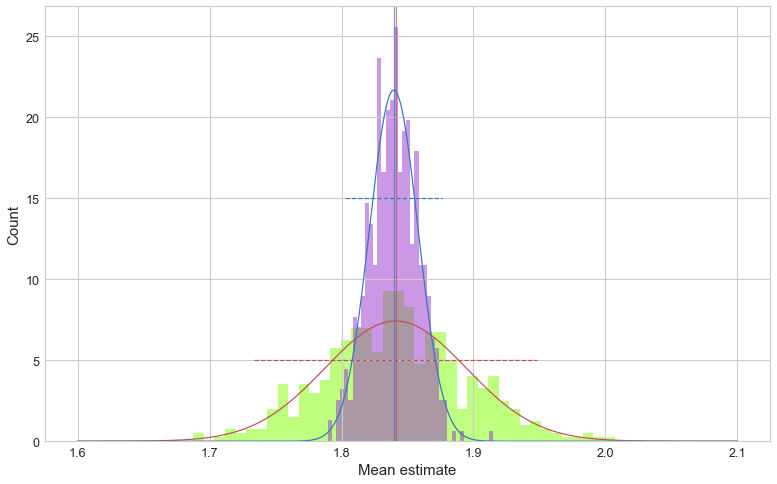

In [79]:
#simulate the population
dist = stats.norm(1.84, 0.17)

population = dist.rvs(1_582_299)

samplesize1   = 10
samplesize2   = 80
numberOfExps  = 500

samplemeans1  = np.zeros(numberOfExps)
samplemeans2  = np.zeros(numberOfExps)

for i in range(numberOfExps):
    # get a sample and compute its mean
    samplemeans1[i] = np.mean(np.random.choice(population, samplesize1))
    samplemeans2[i] = np.mean(np.random.choice(population, samplesize2))

    
gauss1 = stats.norm(samplemeans1.mean(), samplemeans1.std())
gauss2 = stats.norm(samplemeans2.mean(), samplemeans2.std())

x = np.linspace(1.60, 2.10, 1000)
# and show its distribution


# show the distribution
fig, ax = plt.subplots(figsize = (13, 8))
ax.hist(samplemeans1, color = [127 / 255, 255 / 255, 0 / 255, 0.5], density = True, bins = 40);
ax.plot(x, gauss1.pdf(x), color = 'r')
ax.plot([samplemeans1.mean() - 2 * samplemeans1.std(), samplemeans1.mean() + 2 * samplemeans1.std()], [5, 5], 'r--')
ax.axvline(samplemeans1.mean(), c = 'r', alpha = 0.7)
ax.hist(samplemeans2, color = [153 / 255, 50 / 255, 204 / 255, 0.5], density = True, bins = 40);
ax.plot(x, gauss2.pdf(x), color = 'b')
ax.plot([samplemeans2.mean() - 2 * samplemeans2.std(), samplemeans2.mean() + 2 * samplemeans2.std()], [15, 15], 'b--')
ax.axvline(samplemeans2.mean(), c = 'b', alpha = 0.7)
ax.set_xlabel('Mean estimate', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15);

## Intervalo de confianza: definición

- Intervalo de confianza: rango de valores con cierta probabilidad de que un parámetro poblacional desconocido se encuentre dentro en repetidas muestras.

$$P(L < \mu < U) = c$$

Probabilidades típicas del intervalo de confianza:

- 95%
- 99%
- 90%


Los intervalos de confianza están influenciados por el tamaño y la varianza de la muestra.

- Cuando el tamaño de la muestra es mayor, los intervalos de confianza son más cercanos.

[Regresar al contenido](#Contenido)

## Calcular intervalos de confianza mediante fórmula.

En la práctica, no podemos salir y repetir nuestro experimento 500 veces, generalmente solo tomamos una muestra (hacemos un experimento), por lo que necesitamos una forma de calcular los intervalos de confianza utilizando una sola muestra.

$$CI: = \bar{x} \pm t^*(k)\frac{s}{\sqrt{n}}$$


- $ bar {x} $ → media muestral.
- $ t^* $ → valor t con k grados de libertad
- $ s $ → desviación estándar de la muestra
- $ n $ → tamaño de muestra


$ t^* $: valor t asociado con una cola del intervalo de confianza:

$$ t^* = tinv ( \frac{(1 - c)}{2}, n - 1) $$

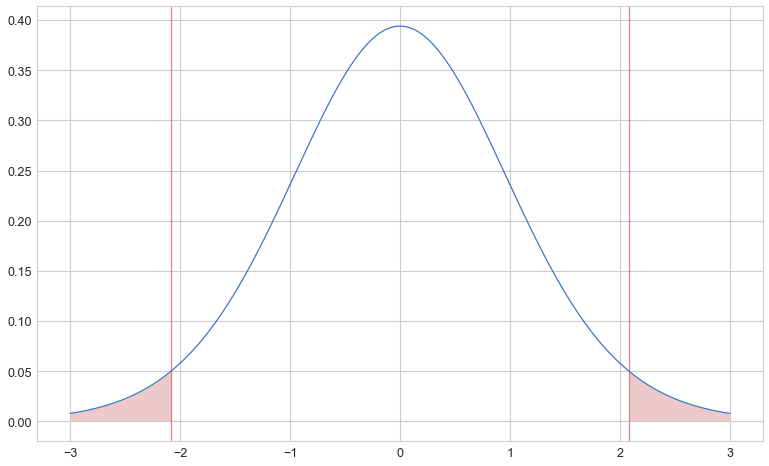

In [80]:
confidence =  0.95

dist = stats.t(20)

x = np.linspace(-3, 3, 1000)


fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, dist.pdf(x))
ax.axvline(dist.ppf((1 - confidence) / 2), color = 'r', alpha = 0.7)
ax.fill_between(x, dist.pdf(x), where = (x <= dist.ppf((1 - confidence) / 2)), alpha = 0.3, color = 'r')
ax.axvline(dist.ppf(1 - ((1 - confidence) / 2)), color = 'r', alpha = 0.7)
ax.fill_between(x, dist.pdf(x), where = (x >= dist.ppf(1 - ((1 - confidence) / 2))), alpha = 0.3, color = 'r');

In [81]:
from matplotlib.patches import Polygon

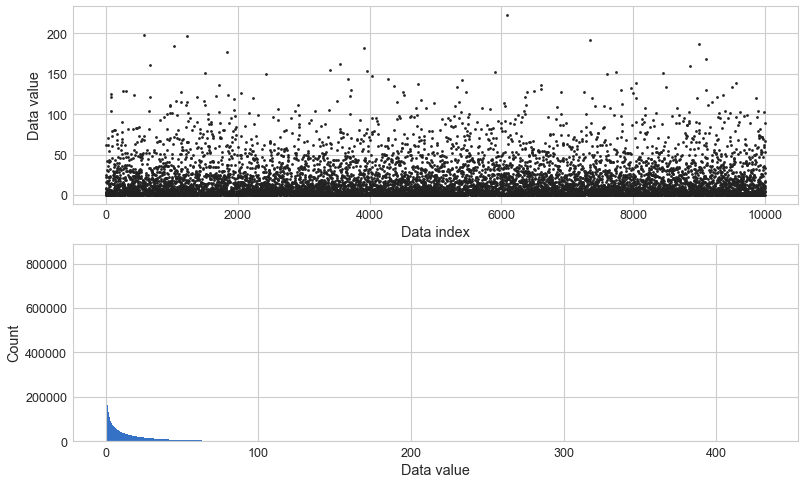

In [82]:
## simulate data

popN = 10_000_000  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4 * np.random.randn(popN)) ** 2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig, ax = plt.subplots(2, 1, figsize = (13, 8))

# only plot every 1000th sample
ax[0].plot(population[::1000], 'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population, bins = 'fd') #Freedman Diaconis Estimator
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value');

Confidence interval computing with formula: [ 4.93774566 12.74802436]


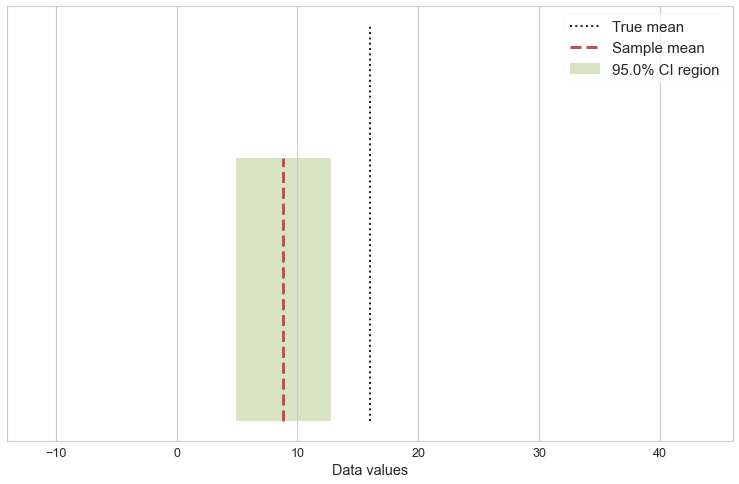

In [105]:
## draw a random sample

# parameters
samplesize = 40
confidence = 0.95 

# compute sample mean
sample = np.random.choice(population, samplesize)
samplemean  = np.mean(sample)
samplestd   = np.std(sample, ddof = 1)

# compute confidence intervals
citmp = (1 - confidence) / 2
confint = samplemean + stats.t.ppf([citmp, 1 - citmp], samplesize - 1) * (samplestd / np.sqrt(samplesize))
print('Confidence interval computing with formula: {}'.format(confint))

# graph everything
fig, ax = plt.subplots(figsize = (13, 8))

y = np.array([[confint[0], 0], [confint[1], 0], [confint[1], 1], [confint[0], 1]])
p = Polygon(y, facecolor = 'g', alpha = 0.3, label = '{}% CI region'.format(confidence * 100))
ax.add_patch(p)

# now add the lines
ax.plot([popMean, popMean], [0, 1.5], 'k:', linewidth = 2, label = 'True mean')
ax.plot([samplemean, samplemean], [0, 1], 'r--', linewidth = 3, label = 'Sample mean')
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(prop = {'size' : 15})
plt.show()

In [87]:
## repeat for large number of samples

# parameters
samplesize = 50
confidence = 0.95
numExperiments = 5000

withinCI = np.zeros(numExperiments)


# part of the CI computation can be done outside the loop
citmp = (1 - confidence) / 2
CI_T  = stats.t.ppf([citmp, 1 - citmp], samplesize - 1)
sqrtN = np.sqrt(samplesize)

for i in range(numExperiments):
    
    # compute sample mean and CI as above
    sample = np.random.choice(population, samplesize)
    samplemean  = np.mean(sample)
    samplestd   = np.std(sample, ddof = 1)
    confint     = samplemean + CI_T * (samplestd / sqrtN)
    
    # determine whether the True mean is inside this CI
    if popMean > confint[0] and popMean < confint[1]:
        withinCI[i] = 1
        
        

print('{}% of sample C.I.s contained the true population mean.'.format(np.round(100 * np.mean(withinCI), 2)))

91.88% of sample C.I.s contained the true population mean.


[Regresar al contenido](#Contenido)

## Intervalos de confianza mediante bootstrapping.

En lugar de utilizar una fórmula para calcular los intervalos de confianza, calcúlelos directamente en función de los datos.
Esto se hace volviendo a muestrear repetidamente al azar de su conjunto de datos. Por lo tanto, imagina que tu muestra es la población y que el remuestreo es la muestra.



Ventajas:
- Funciona para cualquier tipo de parámetro (media, varianza, correlación, mediana, etc.)
- Útil para datos limitados (sin repeticiones de experimentos)
- No basado en supuestos de normalidad.

Limitaciones:
- Da resultados (ligeramente) diferentes cada vez.
- Puede llevar mucho tiempo para grandes conjuntos de datos.
- La muestra debe ser una buena representación de la población.

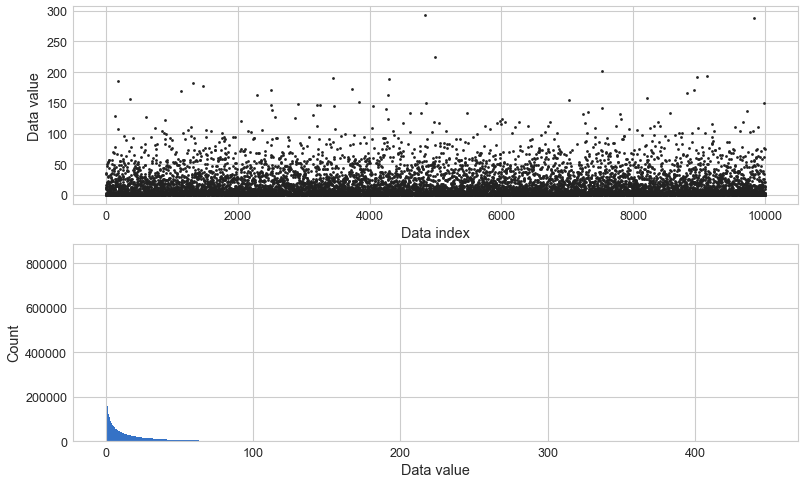

In [106]:
## simulate data

popN = 10_000_000  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4 * np.random.randn(popN)) ** 2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig, ax = plt.subplots(2, 1, figsize = (13, 8))

# only plot every 1000th sample
ax[0].plot(population[::1000], 'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population, bins = 'fd') #Freedman Diaconis Estimator
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value');

In [108]:
## draw a random sample

# parameters
samplesize = 40
confidence = 0.95

# compute sample mean
sample  = np.random.choice(population, samplesize)
samplemean  = np.mean(sample)
samplestd   = np.std(sample) # used later for analytic solution



### now for bootstrapping
numBoots  = 1000
bootmeans = np.zeros(numBoots)

# resample with replacement
for i in range(numBoots):
    bootmeans[i] = np.mean(np.random.choice(sample, samplesize))
    

# find confidence intervals
confint = [0, 0] # initialize
confint[0] = np.percentile(bootmeans, (100 - (confidence * 100)) / 2)
confint[1] = np.percentile(bootmeans, 100 - (100 - (confidence * 100)) / 2)

In [107]:
np.random.choice([1, 2, 3, 4, 5], 5)

array([2, 1, 3, 4, 2])

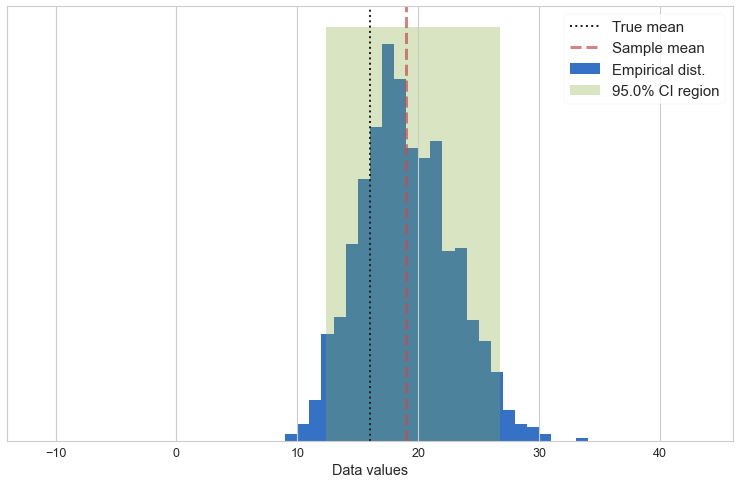

In [109]:
## graph everything
fig, ax = plt.subplots(figsize = (13, 8))

# start with histogram of resampled means
ax.hist(bootmeans, bins = 'fd', label = 'Empirical dist.')

y = np.array([[confint[0], 0], [confint[1], 0], [confint[1], 120], [confint[0], 120]])
p = Polygon(y, facecolor = 'g', alpha = 0.3, label = '{}% CI region'.format(confidence * 100))
ax.add_patch(p)

# now add the lines
ax.axvline(popMean, color = 'k', linewidth = 2, linestyle = ':', label = 'True mean')
ax.axvline(samplemean, color = 'r', linestyle = '--', linewidth = 3, alpha = 0.7, label = 'Sample mean')
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(prop = {'size' : 15});

In [110]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1 - confidence) / 2
confint2 = samplemean + stats.t.ppf([citmp, 1 - citmp], samplesize - 1) * samplestd / np.sqrt(samplesize)

print('Empirical: [{}, {}]'.format(np.round(confint[0], 2), np.round(confint[1], 2)))
print('Analytic:  [{}, {}]'.format(np.round(confint2[0], 2), np.round(confint2[1], 2)))

Empirical: [12.36, 26.72]
Analytic:  [11.22, 26.68]


[Regresar al contenido](#Contenido)

# Ejercicio

El siguiente DataFrame contiene información sobre una encuesta en la que la gente califica su felicidad en un puntaje del 1 al 10 en diferentes países.

- Con los datos proporcionados a continuación, ¿Se puede afirmar que hay una diferencia entre lo felices que son las personas en Europa Oriental y Latinoamérica?

In [ ]:
data = pd.read_csv('2016.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data['Region'].unique()

In [ ]:
mask = data['Region'] == 'Western Europe'
eu_west = data[mask]

In [ ]:
eu_west.head()

In [ ]:
mask = data['Region'] == 'Latin America and Caribbean'
latam = data[mask]

In [ ]:
latam.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 8))


ax[0].hist(eu_west['Happiness Score'])
ax[0].set_title('Western Europe', fontsize = 15)
ax[1].hist(latam['Happiness Score'])
ax[1].set_title('Latin America and Caribbean', fontsize = 15);

In [ ]:
t, p = stats.ttest_ind(eu_west['Happiness Score'], latam['Happiness Score'], equal_var = False)

In [ ]:
p

In [ ]:
stats.mannwhitneyu(eu_west['Happiness Score'], latam['Happiness Score'])

In [ ]:
eu_west['Happiness Score'].mean(), latam['Happiness Score'].mean()

[Regresar al contenido](#Contenido)